<a href="https://colab.research.google.com/github/flake313/Malashin/blob/main/4to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-0.06166512  0.06527911  0.17720697 -0.05182787 -0.51544407 -0.17492418
 -0.62977439 -0.26538056 -0.05790565  0.43662176]
[1, 0, 0, 1, 0, 1, 0, 1, 1, 0]


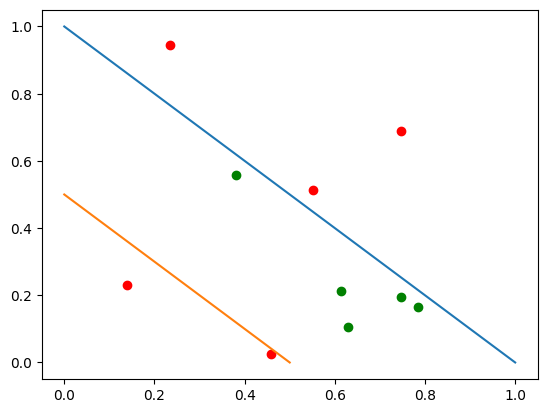

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def activation(x):
    if x < 0 and x > -0.5:
        return 1
    else:
        return 0

def forward(xs, weights):
    s = np.dot(weights, xs)
    print(s)
    out = [activation(value) for value in s]
    return out

W = np.array([1, 1, -1])

N = 10
x1 = np.random.random(N)
x2 = np.random.random(N)
x3 = [1] * N

X = np.array([x1, x2, x3])
result = forward(X, W)
print(result)

A = [0, 1]
B = [1, 0]
C = [0, 0.5]
D = [0.5, 0]
for i in range(N):
    if result[i] == 1:
        plt.scatter(x1[i], x2[i], c='green')
    else:
        plt.scatter(x1[i], x2[i], c='red')

plt.plot(A, B, C, D)
plt.show()

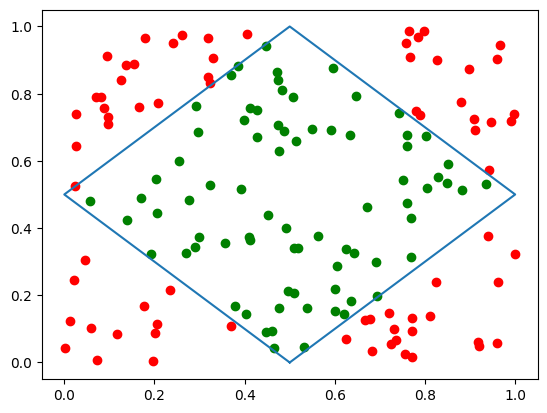

In [3]:
from numpy import random, dot, array
from matplotlib.pyplot import plot, scatter, show

N = 150
A = [0.5, 0, 0.5, 1, 0.5]
B = [0, 0.5, 1, 0.5, 0]

def activation(x): return 0.25<x<0.75
def forward(xs, weights): return [activation(value) for value in dot(weights, xs)]

W1, W2 = array([0.5, -0.5, 0.5]), array([0.5, 0.5, 0])
x1, x2, x3 = random.random(N), random.random(N), [1] * N
X = array([x1, x2, x3])
r1, r2 = forward(X, W1), forward(X, W2)

for i in range(N):
    if r1[i]*r2[i]: scatter(x1[i], x2[i], c='green')
    else: scatter(x1[i], x2[i], c='red')
plot(A, B)
show()

Epoch 0, Loss: 0.2656830463568691 (26.57%)
Epoch 1000, Loss: 0.2351876432787429 (23.52%)
Epoch 2000, Loss: 0.147780455872089 (14.78%)
Epoch 3000, Loss: 0.04901967195549747 (4.90%)
Epoch 4000, Loss: 0.034901739554053776 (3.49%)
Epoch 5000, Loss: 0.02775954092141341 (2.78%)
Epoch 6000, Loss: 0.023968978744808713 (2.40%)
Epoch 7000, Loss: 0.021277465208649714 (2.13%)
Epoch 8000, Loss: 0.019162040876823317 (1.92%)
Epoch 9000, Loss: 0.01837766451318492 (1.84%)
Epoch 10000, Loss: 0.017661010846546067 (1.77%)
Epoch 11000, Loss: 0.01700924518593843 (1.70%)
Epoch 12000, Loss: 0.016423752532619757 (1.64%)
Epoch 13000, Loss: 0.015891984019994282 (1.59%)
Epoch 14000, Loss: 0.015393684720191425 (1.54%)
Epoch 15000, Loss: 0.014906382607060991 (1.49%)
Epoch 16000, Loss: 0.014401302509628195 (1.44%)
Epoch 17000, Loss: 0.01383405151732291 (1.38%)
Epoch 18000, Loss: 0.013137616985829065 (1.31%)
Epoch 19000, Loss: 0.012223538129128386 (1.22%)


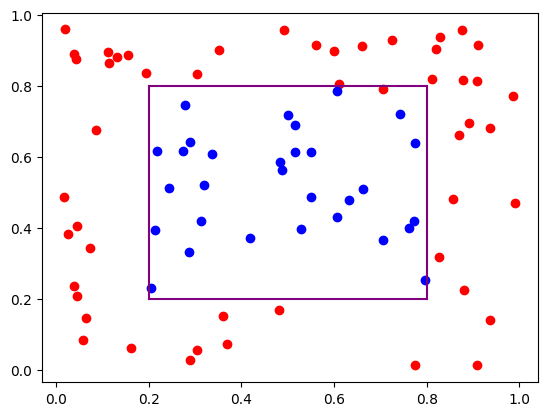

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from scipy.special import expit  # сигмоидальная функция

# количество точек
n = 80
x1 = np.random.random(n)
x2 = np.random.random(n)
X = np.column_stack((x1, x2))

# определение квадрата (вершины)
square = np.array([[0.2, 0.2], [0.8, 0.2], [0.8, 0.8], [0.2, 0.8]])

# создаем путь на основе квадрата для проверки, находятся ли точки внутри
path = Path(square)

# определение меток для точек: 1 - если внутри фигуры, 0 - если снаружи
y = np.array([1 if path.contains_point([x1[i], x2[i]]) else 0 for i in range(n)]).reshape(-1, 1)

# функции активации
def sigmoid(x):
    return expit(x)  # сигмоидальная функция

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# параметры сети
input_size = 2  # входной слой (две координаты)
hidden_size = 20  # скрытый слой
output_size = 1  # выходной слой (1 нейрон - бинарная классификация)

# инициализация весов (случайные значения)
W1 = np.random.randn(input_size, hidden_size) * 0.1  # веса между входным и скрытым слоем
b1 = np.random.randn(1, hidden_size) * 0.1  # смещение для скрытого слоя
W2 = np.random.randn(hidden_size, output_size) * 0.1  # веса между скрытым и выходным слоем
b2 = np.random.randn(1, output_size) * 0.1  # смещение для выходного слоя

# параметры обучения
learning_rate = 0.1
epochs = 20000  # эпохи обучения

# обучение сети
for epoch in range(epochs):
    # прямое распространение
    hidden_input = np.dot(X, W1) + b1  # входим в скрытый слой
    hidden_output = sigmoid(hidden_input)  # выходим из скрытого слоя

    final_input = np.dot(hidden_output, W2) + b2  # входим в выходной слой
    final_output = sigmoid(final_input)  # выход сети (предсказание)

    # ошибка
    error = final_output - y

    # обратное распространение ошибки
    d_output = error * sigmoid_derivative(final_input)  # градиент для выходного слоя
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_input)  # градиент для скрытого слоя

    # обновление весов
    W2 -= learning_rate * hidden_output.T.dot(d_output)  # обновляем веса W2
    b2 -= learning_rate * np.sum(d_output, axis=0)  # обновляем смещение b2
    W1 -= learning_rate * X.T.dot(d_hidden)  # обновляем веса W1
    b1 -= learning_rate * np.sum(d_hidden, axis=0)  # обновляем смещение b1

    # каждые 1000 эпох выводим ошибку для контроля
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        loss_percentage = loss * 100  # преобразование в проценты
        print(f'Epoch {epoch}, Loss: {loss} ({loss_percentage:.2f}%)')

# предсказания на обучающей выборке
predictions = (final_output > 0.5).astype(int).flatten()

# визуализация квадрата
plt.plot([0.2, 0.8], [0.2, 0.2], c="purple")  # нижняя грань
plt.plot([0.8, 0.8], [0.2, 0.8], c="purple")  # правая грань
plt.plot([0.8, 0.2], [0.8, 0.8], c="purple")  # верхняя грань
plt.plot([0.2, 0.2], [0.8, 0.2], c="purple")  # левая грань

# отображение точек в зависимости от предсказаний
for i in range(n):
    if predictions[i] == 1:
        plt.scatter(x1[i], x2[i], c="blue")  # если внутри квадрата
    else:
        plt.scatter(x1[i], x2[i], c="red")  # если снаружи

plt.show()
